Team: Fashion Model(er)s
  
Members: Crystal Chiu, Anthony Cusimano, Junwei Hu
### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC

seed = 1234
np.random.seed(seed)

### Load Data

In [2]:
fashion_data = fetch_openml('Fashion-MNIST', version=1)
X, y = fashion_data.data, fashion_data.target

/usr/local/Caskroom/miniforge/base/envs/cs178/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [127]:
# Split data into train (0.6), validation (0.2), and test (0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = seed)

In [128]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
58414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,144.0,94.0,96.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0
49691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,102.0,150.0,159.0,0.0,0.0,0.0,0.0
8945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,116.0,...,3.0,3.0,0.0,0.0,172.0,219.0,140.0,0.0,0.0,0.0


In [129]:
X.shape

(70000, 784)

### Visualization

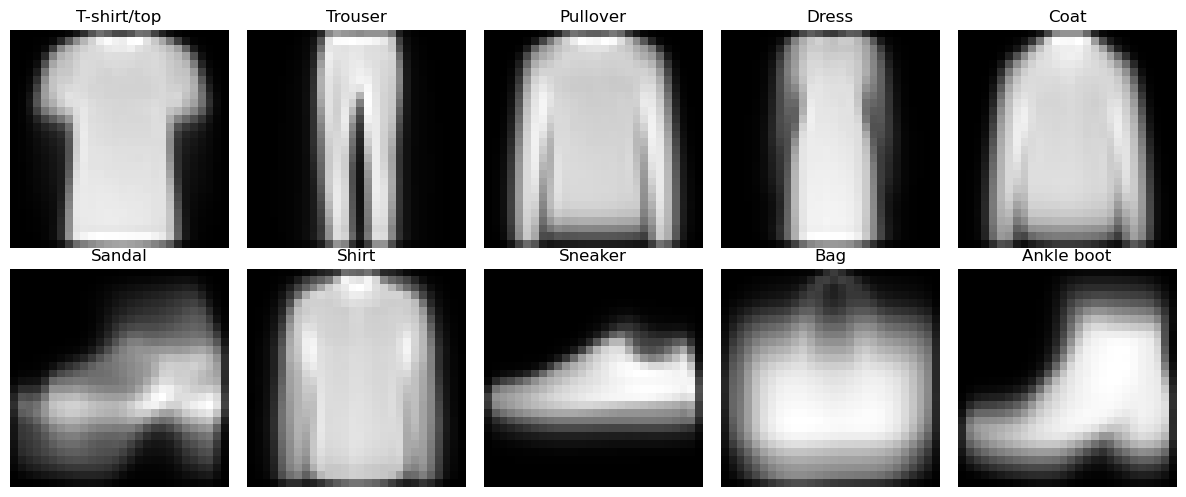

In [82]:
# Visualizing average image for each class
X_plot = X.to_numpy()
y_plot = y.to_numpy()
X_plot = X_plot.reshape(-1, 28, 28).astype(np.uint8)
y_plot = y_plot.astype(int)

num_classes = 10
average_images = np.zeros((num_classes, 28, 28))

for i in range(num_classes):
    class_images = X_plot[y_plot == i]
    average_images[i] = np.mean(class_images, axis=0)

# Plot the average images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i, ax in enumerate(axes):
    ax.imshow(average_images[i], cmap='gray')
    ax.set_title(class_names[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

### Experimentation: SVC model

In [20]:
svc = SVC(C=1.0, gamma='scale', kernel='rbf')

start_time = time.time()
svc.fit(X_train, y_train)
end_time = time.time()

# Get train and test accuracy
train_accuracy = accuracy_score(y_train, svc.predict(X_train))
test_accuracy = accuracy_score(y_test, svc.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {test_accuracy}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Detailed classification report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Training Accuracy: 0.9099107142857142
Validation Accuracy: 0.8899285714285714
Training Time: 291.07 seconds
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1428
           1       0.99      0.97      0.98      1357
           2       0.81      0.81      0.81      1377
           3       0.87      0.90      0.89      1424
           4       0.82      0.85      0.83      1402
           5       0.96      0.96      0.96      1462
           6       0.75      0.64      0.69      1380
           7       0.93      0.96      0.94      1372
           8       0.97      0.98      0.97      1368
           9       0.98      0.95      0.96      1430

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



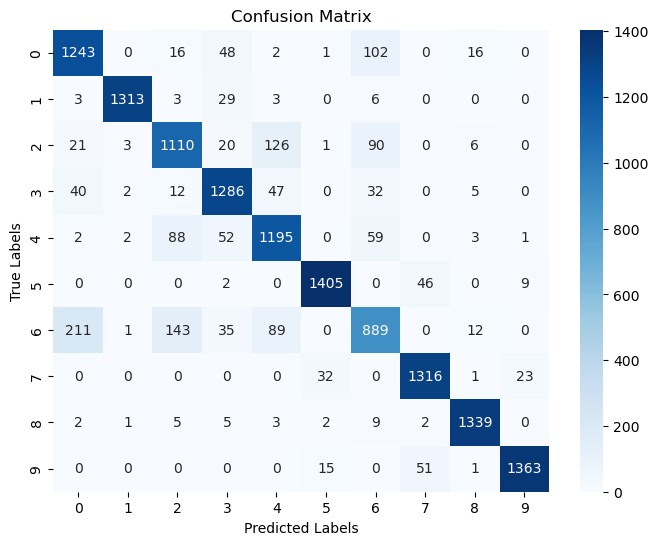

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## kNN Classifier

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation accuracy: 0.8512857142857143


/Users/anthonycusimano/opt/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


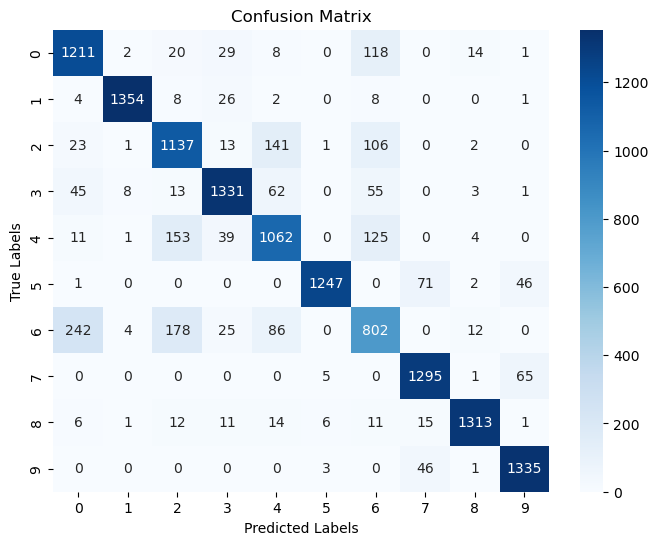

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create the k-NN classifier
knn = KNeighborsClassifier(n_jobs = -1)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train.values.reshape(-1, 28*28), y_train)

# Output the best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

y_pred = grid_search.predict(X_val)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [109]:
y_pred2 = grid_search.predict(X_test)
print(classification_report(y_test, y_pred2))

/Users/anthonycusimano/opt/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1428
           1       0.99      0.96      0.98      1357
           2       0.74      0.77      0.75      1377
           3       0.89      0.87      0.88      1424
           4       0.77      0.78      0.78      1402
           5       0.99      0.88      0.93      1462
           6       0.64      0.58      0.61      1380
           7       0.90      0.96      0.93      1372
           8       0.98      0.96      0.97      1368
           9       0.92      0.97      0.95      1430

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



## Learning Curves

In [144]:
accuracies_by_size = dict()

# Using 25%, 50%, 75%, and 100% of training set
for prop in [.05, .15, .25, .5, .75]:
    grid_search.fit(X_train.iloc[:round(42000*prop)].values.reshape(-1, 28*28), y_train.iloc[:round(42000*prop)])
    y_pred = grid_search.predict(X_test)
    #print(f"Train set size: {round(42000*prop)}")
    #print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    accuracies_by_size[round(42000*prop)] = accuracy_score(y_test, y_pred)

accuracies_by_size[42000] = accuracy_score(y_test, y_pred2)

/Users/anthonycusimano/opt/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Train set size: 2100
Accuracy: 0.8022857142857143



/Users/anthonycusimano/opt/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Train set size: 6300
Accuracy: 0.825



/Users/anthonycusimano/opt/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Train set size: 10500
Accuracy: 0.8358571428571429



/Users/anthonycusimano/opt/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Train set size: 21000
Accuracy: 0.8477857142857143



/Users/anthonycusimano/opt/anaconda3/envs/cs178/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Train set size: 31500
Accuracy: 0.8548571428571429



In [145]:
# Testing accuracies
accuracies_by_size

{2100: 0.8022857142857143,
 6300: 0.825,
 10500: 0.8358571428571429,
 21000: 0.8477857142857143,
 31500: 0.8548571428571429,
 42000: 0.8595}

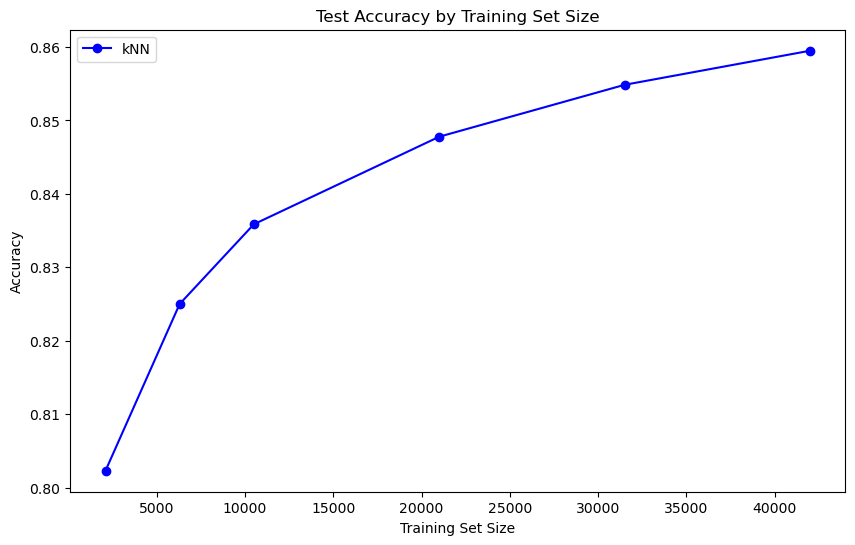

In [146]:
training_sizes = list(accuracies_by_size.keys())
accuracies_knn = list(accuracies_by_size.values())

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracies_knn, marker='o', linestyle='-', color='b', label = "kNN")
#plt.plot(training_sizes, accuracies2, marker='s', linestyle='--', color='r', label='Model 2')

plt.title('Test Accuracy by Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')

#plt.grid(True)
plt.legend()
plt.show()